In [1]:
# Import library

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load image

img = cv2.imread('lupus.jpg')

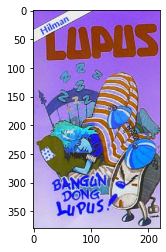

In [3]:
plt.imshow(img)

In [4]:
# Convert from BGR to RGB

rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

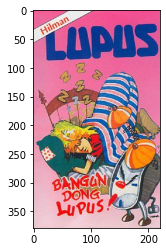

In [5]:
plt.imshow(rgb)

In [6]:
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

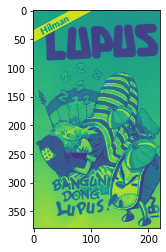

In [7]:
plt.imshow(gray)

In [8]:
rows,cols = img.shape[:2]

In [9]:
# Show original image

cv2.imshow('Original',img)
cv2.waitKey(0)

-1

In [10]:
#identity

kernel_identity = np.array([[0,0,0],[0,1,0],[0,0,0]])
output=cv2.filter2D(img,-1,kernel_identity)
#cv2.imshow('Identity filter',output)
#cv2.waitKey(0)

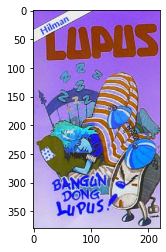

In [11]:
plt.imshow(output)

In [12]:
#blur

kernel_3x3 = np.ones((3,3),np.float32) / 9.0
output=cv2.filter2D(img,-1,kernel_3x3) 
cv2.imshow('Blurring filter',output)
cv2.waitKey(0)

-1

In [13]:
kernel_3x3 

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

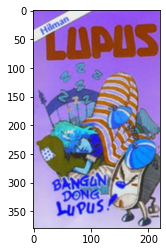

In [14]:
plt.imshow(output)

In [15]:
#larger blur

kernel_5x5 = np.ones((5,5),np.float32) / 25.0
output=cv2.filter2D(img,-1,kernel_5x5)
cv2.imshow('Large Blurring filter',output)
cv2.waitKey(0)

-1

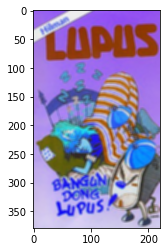

In [16]:
plt.imshow(output)

In [17]:
#motion blur

size = 15
kernel_motion_blur = np.zeros((size,size))
kernel_motion_blur[int((size-1)/2),:] = np.ones(size)
kernel_motion_blur = kernel_motion_blur /  size
output=cv2.filter2D(img,-1,kernel_motion_blur)
cv2.imshow('Motion blur',output)
cv2.waitKey(0)

-1

In [18]:
#sharpen

kernel_sharpen_1 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
output1=cv2.filter2D(img,-1,kernel_sharpen_1)
cv2.imshow('Sharpening',output1)
cv2.waitKey(0)

-1

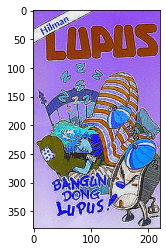

In [19]:
plt.imshow(output1)

In [20]:
#more shapening

kernel_sharpen_2 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
output2=cv2.filter2D(img,-1,kernel_sharpen_2)
cv2.imshow('Excessive sharpening',output2)
cv2.waitKey(0)

-1

In [21]:
#edge enhancement

kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],[-1,2,2,2,-1],[-1,2,8,2,-1],[-1,2,2,2,-1],[-1,-1,-1,-1,-1]])/8.0
output3=cv2.filter2D(img,-1,kernel_sharpen_3)
cv2.imshow('Edge Enhancement',output3)
cv2.waitKey(0)

-1

In [22]:
#emboss

kernel_emboss1=np.array([[0,-1,1],[1,0,-1],[1,1,0]])
output=cv2.filter2D(gray,-1,kernel_emboss1)+128
cv2.imshow('Emboss1',output)
cv2.waitKey(0)

-1

In [23]:
#emboss2

kernel_emboss2=np.array([[-1,-1,0],[-1,0,11],[0,1,1]])
output=cv2.filter2D(gray,-1,kernel_emboss2)+128
cv2.imshow('Emboss2',output)
cv2.waitKey(0)

-1

In [24]:
#emboss3

kernel_emboss3=np.array([[1,0,0],[0,0,0],[0,0,-1]])
output=cv2.filter2D(gray,-1,kernel_emboss3)+128
cv2.imshow('Emboss3',output)
cv2.waitKey(0)

-1

In [25]:
#Sobel vertikal

sobel_vertical = cv2.Sobel(img,cv2.CV_64F, 1,0,ksize=5)
cv2.imshow('Sobel vertikal',sobel_vertical)
cv2.waitKey(0)

-1

In [26]:
#Sobel horizontal

sobel_horizontal = cv2.Sobel(img,cv2.CV_64F, 0,1,ksize=5)
cv2.imshow('Sobel horizontal',sobel_horizontal)
cv2.waitKey(0)

-1

In [27]:
#erode

kernel_erode=np.ones((5,5),np.uint8)
img_erosion = cv2.erode(img,kernel_erode,iterations = 1)
cv2.imshow('Erode',img_erosion)
cv2.waitKey(0)

-1

In [28]:
#dilate

img_dilatation = cv2.dilate(img,kernel_erode,iterations = 1)
cv2.imshow('Dilate',img_dilatation)
cv2.waitKey(0)

-1

In [29]:
#vignette

kernel_gauss_x= cv2.getGaussianKernel(cols,200)
kernel_gauss_y = cv2.getGaussianKernel(rows,200)
kernel = kernel_gauss_y * kernel_gauss_x.T
mask=255*kernel/np.linalg.norm(kernel)
output=np.copy(img)
for i in range(3):
  output[:,:,i]=output[:,:,i] * mask
cv2.imshow('Vignette',output)
cv2.waitKey(0)

-1

In [30]:
#shifted vignette

kernel_gauss_x= cv2.getGaussianKernel(int(1.5*cols),200)
kernel_gauss_y = cv2.getGaussianKernel(int(1.5*rows),200)
kernel = kernel_gauss_y * kernel_gauss_x.T
mask=255*kernel/np.linalg.norm(kernel)
mask = mask[int(0.5*rows):,int(0.5*cols):]
output=np.copy(img)
for i in range(3):
  output[:,:,i]=output[:,:,i] * mask
cv2.imshow('Shifted Vignette',output)
cv2.waitKey(0)

-1

In [31]:
#constrast: b&w

img_bw = cv2.imread('lupus.jpg',0)
histeq=cv2.equalizeHist(img_bw)
cv2.imshow('Input',img)
cv2.imshow('Historgram equalized',histeq)
cv2.waitKey(0)

-1

In [32]:
#contrast:RGB

img_yuv=cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
img_yuv[:,:,0]=cv2.equalizeHist(img_yuv[:,:,0])
output=cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)
cv2.imshow('Histogram equalized',img)
cv2.waitKey(0)

-1

In [33]:
kernel_3x3 = np.ones((3,3),np.float32) / 9.0